# 🏆 05 - Experiment Comparison & Model Selection

## 📑 Table of Contents
1. [🎯 Objectives](#-objectives)
2. [⚙️ Setup & Imports](#-setup--imports)
3. [📊 Load All Experiment Results](#-load-all-experiment-results)
4. [📈 Results Overview](#-results-overview)
5. [🔍 Detailed Analysis by Approach](#-detailed-analysis-by-approach)
6. [🥇 Best Model Selection](#-best-model-selection)
7. [📋 Final Recommendation](#-final-recommendation)

# 🎯 Objectives
- Compare all experiment results across different approaches
- Identify the best performing model based on F1 score
- Provide recommendations for final model selection



---

## **⚙️ 1. Setup & Imports**


In [20]:
# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

import warnings
warnings.filterwarnings("ignore")

# ⚙️ Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.experiment_tracker import load_experiment_results, get_best_experiment

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline



---

## **📥 2. Load All Experiment Results**


In [21]:
# 📊 Load All Experiment Results
print("📁 Loading all experiment results...")
results_df = load_experiment_results()

if results_df.empty:
    print("❌ No experiment results found!")
else:
    print(f"✅ Loaded {len(results_df)} experiments")
    print(f"🔧 Experiment types: {results_df['experiment_type'].unique().tolist()}")
    
    # Display latest results
    latest_results = results_df.sort_values('timestamp', ascending=False).head()
    display(latest_results)
    # display(results_df)


📁 Loading all experiment results...
✅ Loaded 55 experiments
🔧 Experiment types: ['traditional_nlp', 'sentence_transformers']


,experiment_type,model_name,preprocessing,accuracy,precision,recall,f1_score,roc_auc,dataset,notes,experiment_id,timestamp
54,sentence_transformers,SVC,aggressive,0.946541,0.940040,0.963487,0.951619,0.988635,fake_news,"Features: ['clean_text', 'title_length', 'text...",se_s_20250905_025423,2025-09-05T02:54:23.054690
53,sentence_transformers,SVC,aggressive,0.946541,0.940040,0.963487,0.951619,0.988635,fake_news,"Features: ['clean_text', 'title_length', 'text...",se_s_20250905_025423,2025-09-05T02:54:23.041580
52,sentence_transformers,SVC,aggressive,0.940789,0.942784,0.949087,0.945925,0.987562,fake_news,"Features: ['title_length', 'title_word_count',...",se_s_20250905_020552,2025-09-05T02:05:52.518514
51,sentence_transformers,SVC,aggressive,0.947524,0.941472,0.963744,0.952478,0.988986,fake_news,"Features: ['clean_text', 'title_length', 'titl...",se_s_20250905_011514,2025-09-05T01:15:14.349862
50,sentence_transformers,SVC,aggressive,0.947804,0.941280,0.964515,0.952756,0.988714,fake_news,"Features: ['clean_text', 'title_length', 'text...",se_s_20250905_003857,2025-09-05T00:38:57.176844


In [22]:
display(results_df)

,experiment_type,model_name,preprocessing,accuracy,precision,recall,f1_score,roc_auc,dataset,notes,experiment_id,timestamp
0,traditional_nlp,Logistic Regression,original,0.943923,0.930859,0.959250,0.944841,0.987698,fake_news,TF-IDF with original processing,tr_lr_20250902_231836,2025-09-02T23:18:36.927944
1,traditional_nlp,Random Forest,original,0.933659,0.928607,0.939750,0.934145,0.982709,fake_news,TF-IDF with original processing,tr_rf_20250902_231837,2025-09-02T23:18:37.577347
2,traditional_nlp,SVM,original,0.949556,0.940269,0.960250,0.950155,0.988874,fake_news,TF-IDF with original processing,tr_s_20250902_231841,2025-09-02T23:18:41.886275
3,traditional_nlp,Naive Bayes,original,0.933033,0.940056,0.925250,0.932594,0.983121,fake_news,TF-IDF with original processing,tr_nb_20250902_231841,2025-09-02T23:18:41.949688
4,traditional_nlp,Logistic Regression,stemmed,0.944424,0.931763,0.959250,0.945307,0.987025,fake_news,TF-IDF with stemmed processing,tr_lr_20250902_231842,2025-09-02T23:18:42.792748
5,traditional_nlp,Random Forest,stemmed,0.930655,0.926063,0.936250,0.931129,0.980929,fake_news,TF-IDF with stemmed processing,tr_rf_20250902_231844,2025-09-02T23:18:44.102883
6,traditional_nlp,SVM,stemmed,0.946426,0.937102,0.957250,0.947069,0.987909,fake_news,TF-IDF with stemmed processing,tr_s_20250902_231849,2025-09-02T23:18:49.561800
7,traditional_nlp,Naive Bayes,stemmed,0.931030,0.936914,0.924500,0.930666,0.981386,fake_news,TF-IDF with stemmed processing,tr_nb_20250902_231850,2025-09-02T23:18:50.396857
8,traditional_nlp,Logistic Regression,lemmatized,0.942546,0.930255,0.957000,0.943438,0.986540,fake_news,TF-IDF with lemmatized processing,tr_lr_20250902_231850,2025-09-02T23:18:50.805605
9,traditional_nlp,Random Forest,lemmatized,0.927776,0.921863,0.935000,0.928385,0.979589,fake_news,TF-IDF with lemmatized processing,tr_rf_20250902_231851,2025-09-02T23:18:51.723792



---

## **📈 3. Results Overview**


In [23]:
# 📈 Results Overview
if not results_df.empty:
    print("📊 Results Overview:")
    print("=" * 50)
    
    # Summary statistics
    summary = results_df.groupby(['experiment_type', 'model_name', 'preprocessing']).agg({
        'f1_score': ['mean', 'std', 'count'],
        'accuracy': ['mean', 'std'],
        'precision': ['mean'],
        'recall': ['mean'],
        'roc_auc': ['mean']
    }).round(4)
    
    display(summary)
    
    # Sort by F1 score (your primary metric)
    best_by_f1 = results_df.sort_values('f1_score', ascending=False).head(10)
    print("🏆 Top 10 Experiments by F1 Score:")
    display(best_by_f1[['experiment_type', 'model_name', 'preprocessing', 'f1_score', 'accuracy']])


📊 Results Overview:


f1_score  \
                                                                       mean   
experiment_type       model_name          preprocessing                       
sentence_transformers LightGBM            aggressive                 0.9376   
                      Logistic Regression basic_cleaning             0.9311   
                      Random Forest       basic_cleaning             0.9197   
                      SVC                 aggressive                 0.9461   
                      SVM                 aggressive                 0.9557   
                                          basic                      0.9483   
                                          basic_cleaning             0.9396   
                      XGBoost             aggressive                 0.9398   
traditional_nlp       Logistic Regression lemmatized                 0.9671   
                                          minimal cleaning no dups   0.9961   
                                          minimal_cleaning           0.9950   
                                          no cleaning no dups        0.9961   
                                          no_cleaning                0.9947   
                                          original                   0.9678   
                                          stemmed                    0.9680   
                      Naive Bayes         lemmatized                 0.9429   
                                          original                   0.9443   
                                          stemmed                    0.9423   
                      Random Forest       lemmatized                 0.9552   
                                          original                   0.9585   
                                          stemmed                    0.9575   
                      SVM                 lemmatized                 0.9724   
                                          original                   0.9731   
                                          stemmed                    0.9715   

                                                                            \
                                                                       std   
experiment_type       model_name          preprocessing                      
sentence_transformers LightGBM            aggressive                0.0000   
                      Logistic Regression basic_cleaning               NaN   
                      Random Forest       basic_cleaning               NaN   
                      SVC                 aggressive                0.0205   
                      SVM                 aggressive                   NaN   
                                          basic                     0.0021   
                                          basic_cleaning               NaN   
                      XGBoost             aggressive                   NaN   
traditional_nlp       Logistic Regression lemmatized                0.0335   
                                          minimal cleaning no dups     NaN   
                                          minimal_cleaning             NaN   
                                          no cleaning no dups          NaN   
                                          no_cleaning                  NaN   
                                          original                  0.0325   
                                          stemmed                   0.0321   
                      Naive Bayes         lemmatized                0.0188   
                                          original                  0.0166   
                                          stemmed                   0.0164   
                      Random Forest       lemmatized                0.0379   
                                          original                  0.0344   
                                          stemmed                   0.0373   
                      SVM                 lemmatized         

🏆 Top 10 Experiments by F1 Score:


,experiment_type,model_name,preprocessing,f1_score,accuracy
37,traditional_nlp,SVM,lemmatized,0.996503,0.996495
42,traditional_nlp,Logistic Regression,minimal cleaning no dups,0.996088,0.996100
41,traditional_nlp,Logistic Regression,no cleaning no dups,0.996088,0.996100
29,traditional_nlp,SVM,original,0.996002,0.995994
33,traditional_nlp,SVM,stemmed,0.995880,0.995869
40,traditional_nlp,Logistic Regression,minimal_cleaning,0.994992,0.994993
39,traditional_nlp,Logistic Regression,no_cleaning,0.994743,0.994743
27,traditional_nlp,Logistic Regression,original,0.990771,0.990737
35,traditional_nlp,Logistic Regression,lemmatized,0.990764,0.990737
31,traditional_nlp,Logistic Regression,stemmed,0.990643,0.990612



---

## **🔍 4. Detailed Analysis by Approach**


📈 Detailed Analysis by Approach:


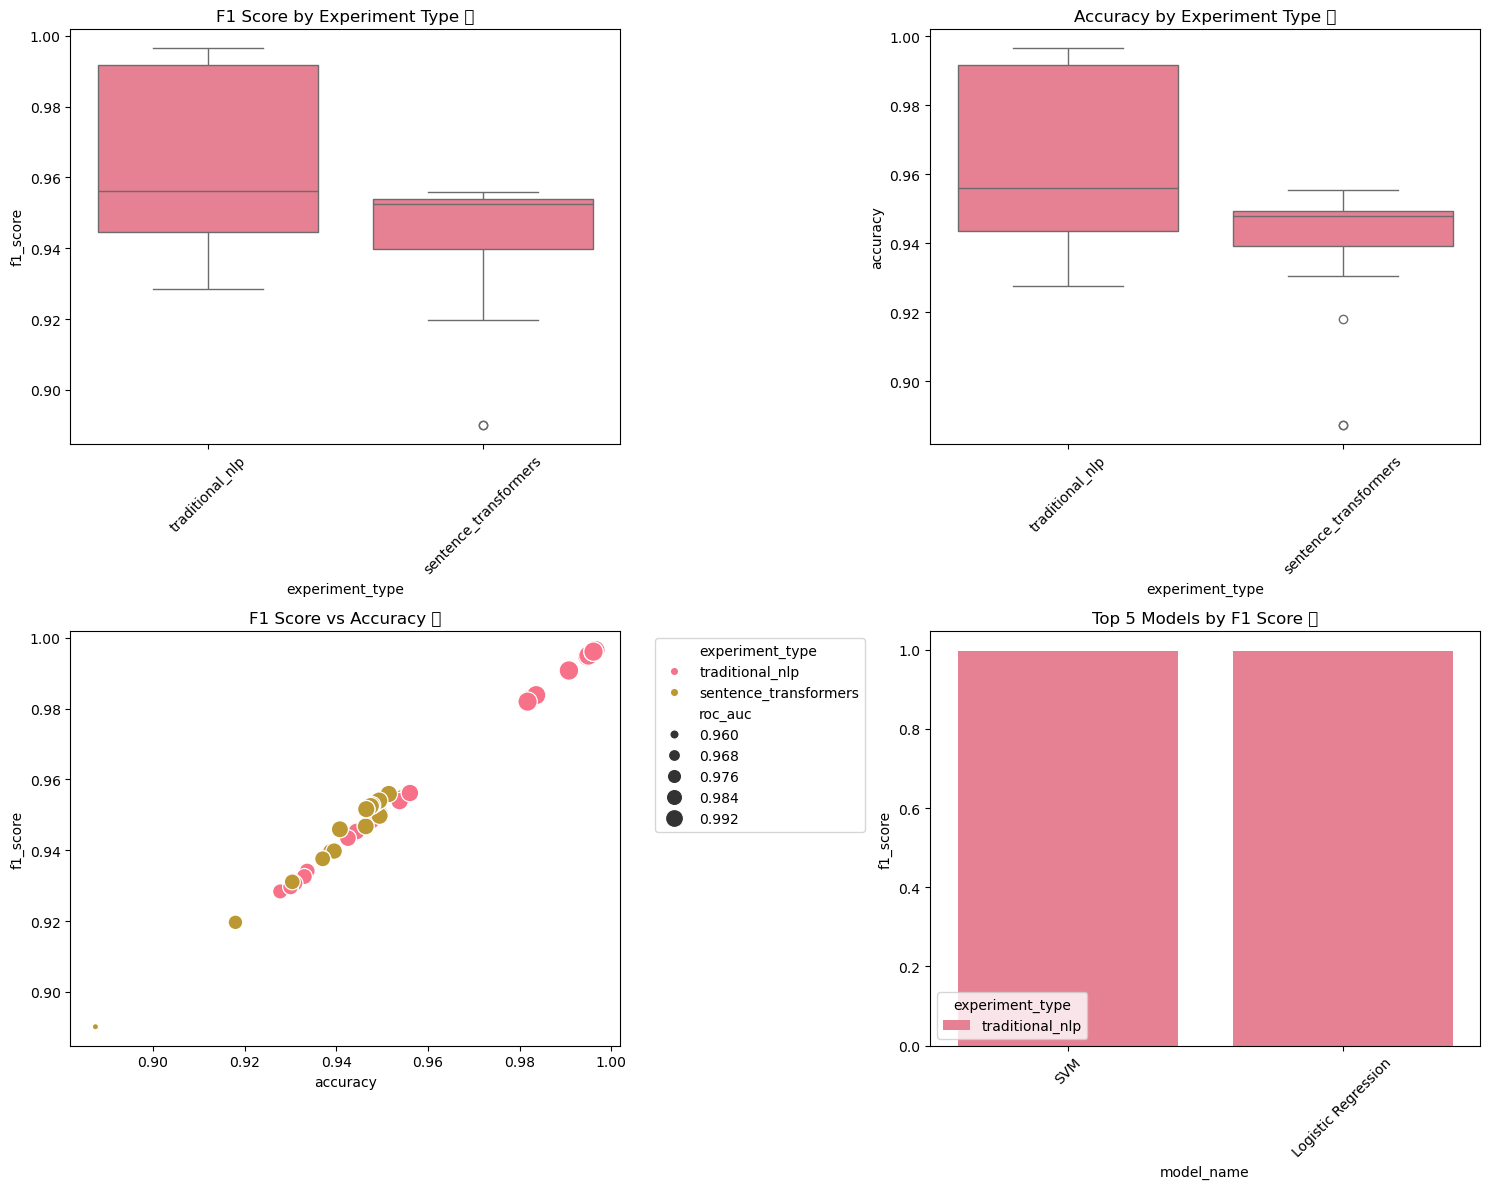

🥇 Best Model Selection:
🎉 BEST OVERALL EXPERIMENT:
   experiment_type: traditional_nlp
   model_name: SVM
   preprocessing: lemmatized
   accuracy: 0.9964951808737014
   precision: 0.9957563654518222
   recall: 0.99725
   f1_score: 0.9965026230327254
   roc_auc: 0.9998670092755076
   dataset: fake_news
   notes: TF-IDF with lemmatized processing
   experiment_id: tr_s_20250904_030337
   timestamp: 2025-09-04T03:03:37.393172

🔍 Best by Accuracy: SVM (traditional_nlp) - 0.9965


In [24]:
# 🔍 Detailed Analysis by Approach
if not results_df.empty:
    print("📈 Detailed Analysis by Approach:")
    print("=" * 50)
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. F1 Score by Experiment Type
    sns.boxplot(data=results_df, x='experiment_type', y='f1_score', ax=axes[0, 0])
    axes[0, 0].set_title('F1 Score by Experiment Type 🎯')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Accuracy by Experiment Type
    sns.boxplot(data=results_df, x='experiment_type', y='accuracy', ax=axes[0, 1])
    axes[0, 1].set_title('Accuracy by Experiment Type 📊')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. F1 vs Accuracy Scatter
    sns.scatterplot(data=results_df, x='accuracy', y='f1_score', hue='experiment_type', 
                    size='roc_auc', sizes=(20, 200), ax=axes[1, 0])
    axes[1, 0].set_title('F1 Score vs Accuracy 📍')
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 4. Best Models Highlight
    top_models = results_df.nlargest(5, 'f1_score')
    sns.barplot(data=top_models, x='model_name', y='f1_score', hue='experiment_type', ax=axes[1, 1])
    axes[1, 1].set_title('Top 5 Models by F1 Score 🏆')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# 🥇 Best Model Selection
if not results_df.empty:
    print("🥇 Best Model Selection:")
    print("=" * 50)
    
    # Get best experiment based on F1 score
    best_experiment = get_best_experiment(results_df, 'f1_score')
    
    print("🎉 BEST OVERALL EXPERIMENT:")
    for key, value in best_experiment.items():
        print(f"   {key}: {value}")
    
    # Also show best by accuracy for comparison
    best_by_accuracy = get_best_experiment(results_df, 'accuracy')
    print(f"\n🔍 Best by Accuracy: {best_by_accuracy['model_name']} "
          f"({best_by_accuracy['experiment_type']}) - {best_by_accuracy['accuracy']:.4f}")


---

## **📋 5. Final Recommendation**

In [25]:
# 📋 Final Recommendation
if not results_df.empty:
    print("\n📋 Final Recommendation:")
    print("=" * 50)
    
    # Analyze trade-offs
    high_f1 = results_df[results_df['f1_score'] >= 0.9]  # Adjust threshold as needed
    if not high_f1.empty:
        best_combo = high_f1.sort_values('accuracy', ascending=False).iloc[0]
        
        print("🚀 DEPLOYMENT RECOMMENDATION:")
        print(f"   Model: {best_combo['model_name']}")
        print(f"   Approach: {best_combo['experiment_type']}")
        print(f"   Preprocessing: {best_combo['preprocessing']}")
        print(f"   Expected F1: {best_combo['f1_score']:.3f}")
        print(f"   Expected Accuracy: {best_combo['accuracy']:.3f}")
        
        # Additional considerations
        print("\n💡 ADDITIONAL CONSIDERATIONS:")
        if best_combo['experiment_type'] == 'sentence_transformers':
            print("   - Modern approach with better context understanding")
            print("   - May require more computational resources")
        else:
            print("   - Traditional approach with good interpretability")
            print("   - Generally faster training and prediction")
    else:
        print("⚠️ No model reached the desired F1 threshold. Consider:")
        print("   - Trying different hyperparameters")
        print("   - Adding more data")
        print("   - Trying more advanced models (e.g., transformers)")


📋 Final Recommendation:
🚀 DEPLOYMENT RECOMMENDATION:
   Model: SVM
   Approach: traditional_nlp
   Preprocessing: lemmatized
   Expected F1: 0.997
   Expected Accuracy: 0.996

💡 ADDITIONAL CONSIDERATIONS:
   - Traditional approach with good interpretability
   - Generally faster training and prediction
